# Chapter 3: Nonlinear Equations in One Variable

Based on the Matlab [files](http://www.siam.org/books/cs07/programs.zip) for the book [A First Course in Numerical Methods](http://www.siam.org/books/cs07/), by Ascher and Greif.

Julia version by Michael P. Friedlander and Michael P. Wathen.

In [1]:
using PyPlot, LaTeXStrings

# Root finding

Code showing real roots of three function:
- $f(x) = \sin(x)$ on $[0, 4\pi]$
- $f(x) = x^3 − 30 x^2 + 2552$ on $[0, 20]$
- $f(x) = 10\cosh(x/4) − x$ on $[− 10, 10]$

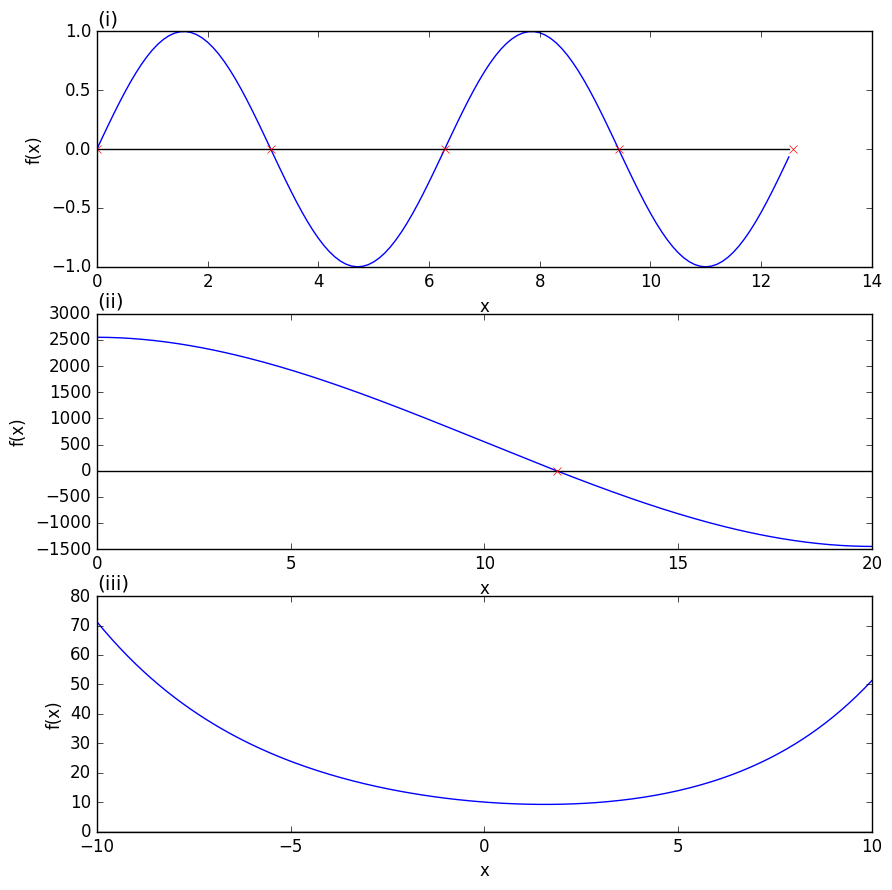

In [2]:
fig = figure("pyplot_subplot_mixed",figsize=(10,10))

t = 0:.1:4pi
tt = sin(t)
ax = zeros(length(t))
xrt = 0:pi:4pi
yrt = zeros(5)
subplot(3,1,1)
plot(t,tt,"b",t,ax,"k",xrt,yrt,"rx")
title("(i)", loc="left")
xlabel("x")
ylabel("f(x)")

t = 0:.1:20
tt = t.^3 - 30*t.^2 + 2552
ax = zeros(length(t))
subplot(3,1,2)
plot(t,tt,"b",t,ax,"k",11.8615,0,"rx")
title("(ii)", loc="left")
xlabel("x")
ylabel("f(x)")

t = -10:.1:10
tt = 10 * cosh(t ./4) - t
ax = zeros(length(t))
subplot(3,1,3)
plot(t,tt,"b",t,ax,"k")
title("(iii)", loc="left")
xlabel("x")
ylabel("f(x)");

## Bisection method

Root finding with the [bisection method](https://en.wikipedia.org/wiki/Bisection_method).

In [3]:
# Assume f(a)*f(b)<0 and that there is a value root in (a,b) such that func(root) = 0.
# Return a value `p` such that 
#      | p - root | < atol
#
function bisect(f, a, b; atol=1e-6, ftol=1e-12, maxIts=1e6, verbose=false)
    fa, fb = f(a), f(b)
    if (a ≥ b) || (fa*fb ≥ 0)
        error("Incorrect inputs!")
    end
    verbose && @printf "%4s: %15s  %15s  %10s  %10s  %10s  %10s\n" "n" "a" "b" "fa" "fb" "fp" "|b-a|"
    for k in 0:maxIts
        p = (a+b)/2
        fpOld = fp = f(p)
        if fa*fp < 0
            b, fb = p, fp
        else
            a, fa = p, fp
        end
        verbose && @printf "%4i: %15.5e  %15.5e  %10.2e  %10.2e  %10.2e  %10.2e\n" k a  b fa fb fpOld abs(b-a)
        abs(fp)  < ftol && return p
        abs(b-a) ≤ atol && return p
    end
end;

Apply bisection to compute $\sqrt2 $. We do this by applying bisection to the function
$$
f(x):=x^2 - 2,
$$
and observe that $f(x)=0$ if and only if $x=\sqrt2$. We'll use the bracket $[1,2]$.

In [4]:
a, b = 1, 2
f = x -> x^2 - 2
x = bisect(f, a, b, atol=1e-6, verbose=true)
err = abs(x - sqrt(2))/sqrt(2)

   n:               a                b          fa          fb          fp       |b-a|
   0:     1.00000e+00      1.50000e+00   -1.00e+00    2.50e-01    2.50e-01    5.00e-01
   1:     1.25000e+00      1.50000e+00   -4.38e-01    2.50e-01   -4.38e-01    2.50e-01
   2:     1.37500e+00      1.50000e+00   -1.09e-01    2.50e-01   -1.09e-01    1.25e-01
   3:     1.37500e+00      1.43750e+00   -1.09e-01    6.64e-02    6.64e-02    6.25e-02
   4:     1.40625e+00      1.43750e+00   -2.25e-02    6.64e-02   -2.25e-02    3.13e-02
   5:     1.40625e+00      1.42188e+00   -2.25e-02    2.17e-02    2.17e-02    1.56e-02
   6:     1.41406e+00      1.42188e+00   -4.27e-04    2.17e-02   -4.27e-04    7.81e-03
   7:     1.41406e+00      1.41797e+00   -4.27e-04    1.06e-02    1.06e-02    3.91e-03
   8:     1.41406e+00      1.41602e+00   -4.27e-04    5.10e-03    5.10e-03    1.95e-03
   9:     1.41406e+00      1.41504e+00   -4.27e-04    2.34e-03    2.34e-03    9.77e-04
  10:     1.41406e+00      1.41455e+00   -4

4.043542140047818e-7

Now compare the number of required iterations with the predicted bound
$$
n\approx \log_2\left(\frac{b-a}{2\hbox{atol}}\right).
$$

In [5]:
log2( (b-a)/ 2e-6 )

18.931568569324174

## Fixed-point iteration

Root finding with the [fixed-point](https://en.wikipedia.org/wiki/Fixed-point_iteration) iteration.

### Example 3.4
 Let's apply the fixed-point method to find a point $x^*$ that satisfies the equation
$$
x = e^{-x}.
$$
Let's first make a function for the algorithm.

In [6]:
function fixedpt(g, x; atol=1e-6, verbose=false)
    err = Inf
    verbose && @printf "%3s:  %10s\n"  "k" "err"
    for k=0:1000
        xnew = g(x)
        err = abs(x-xnew)
        verbose && @printf "%3i:  %10.2e\n"  k err
        err < atol && break
        x = xnew
    end 
    return x
end;

In [7]:
g = x -> e^(-x)
x = fixedpt(g, 1, atol=1e-6, verbose=true)

  k:         err
  0:    6.32e-01
  1:    3.24e-01
  2:    1.92e-01
  3:    1.06e-01
  4:    6.08e-02
  5:    3.42e-02
  6:    1.95e-02
  7:    1.10e-02
  8:    6.26e-03
  9:    3.55e-03
 10:    2.01e-03
 11:    1.14e-03
 12:    6.48e-04
 13:    3.67e-04
 14:    2.08e-04
 15:    1.18e-04
 16:    6.70e-05
 17:    3.80e-05
 18:    2.16e-05
 19:    1.22e-05
 20:    6.93e-06
 21:    3.93e-06
 22:    2.23e-06
 23:    1.26e-06
 24:    7.17e-07


0.5671437480994115

Let's visualize the fixed-point iterations.

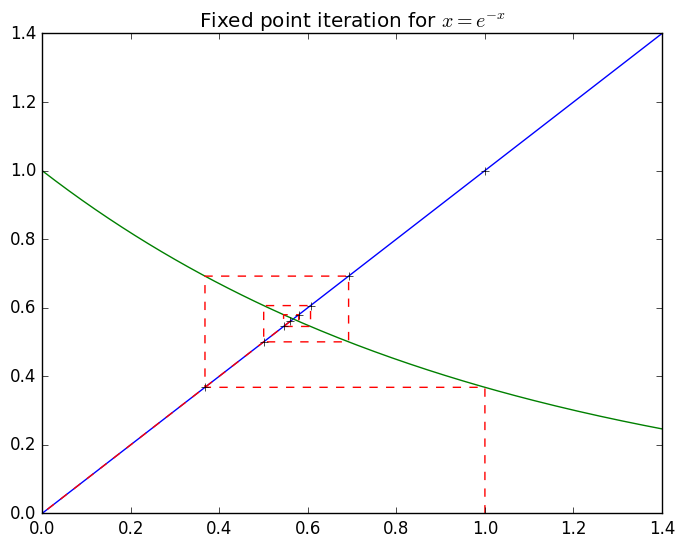

In [8]:
x = 0:.01:1.4
y1 = x
y2 = exp(-x)
plot(x,y1,x,y2)

n=8; xx = zeros(n); zer = xx
xx[1] = 1
for j = 1:n-1
    xx[j+1] = exp(-xx[j])
end
itx = zeros(2n)
itx[1:2:2n-1] = xx
itx[2:2:2(n-1)] = xx[1:n-1]
ity = zeros(length(itx))
ity[1] = 0
ity[2:2:2(n-1)] = xx[2:n]
ity[3:2:2n-1] = xx[2:n]
plot(itx,ity,"r--")
plot(xx,zer,"k+")
title(L"Fixed point iteration for $x = e^{-x}$");

### Example 3.5

We aim to find a root of $$f(x) = 2\cosh(x/4)-x.$$ We'll do this by applying the fixed-point method to the function $$g(x) = 2\cosh(x/4).$$ Here's the picture.

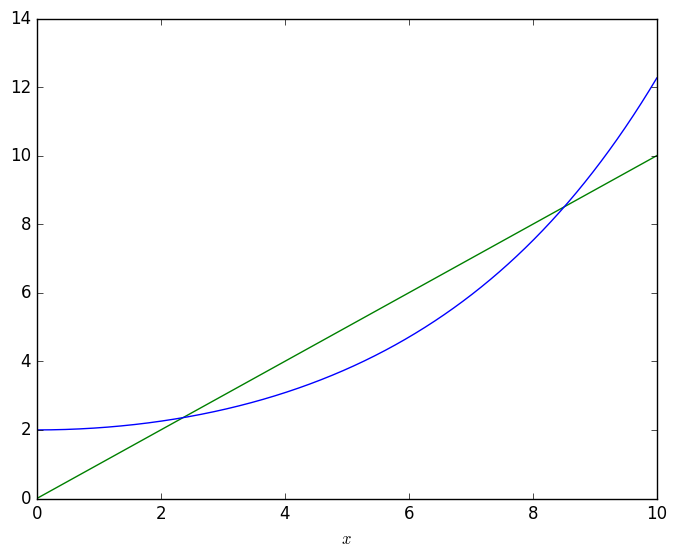

In [9]:
x = 0:10
plot(x,x,"g")

x = 0:.01:10
g = 2cosh(x/4)
plot(x,g,"b")
xlabel(L"$x$");

Now apply the fixed-point method to $$g(x) = 2\cosh(x/4).$$ We'll start close at 2 to get close to the first fixed point. 

In [10]:
g = x->2cosh(x/4)
x = fixedpt(g, 2, atol=1e-8, verbose=true)

  k:         err
  0:    2.55e-01
  1:    7.11e-02
  2:    2.15e-02
  3:    6.65e-03
  4:    2.07e-03
  5:    6.45e-04
  6:    2.01e-04
  7:    6.28e-05
  8:    1.96e-05
  9:    6.11e-06
 10:    1.91e-06
 11:    5.95e-07
 12:    1.86e-07
 13:    5.79e-08
 14:    1.81e-08
 15:    5.64e-09


2.357551045676038

Apply `bisection` to $f(x)=0$.

In [13]:
f = x->2cosh(x/4)-x
x = bisect(f,2,4,atol=1e-8,verbose=true)

   n:               a                b          fa          fb          fp       |b-a|
   0:     2.00000e+00      3.00000e+00    2.55e-01   -4.11e-01   -4.11e-01    1.00e+00
   1:     2.00000e+00      2.50000e+00    2.55e-01   -9.65e-02   -9.65e-02    5.00e-01
   2:     2.25000e+00      2.50000e+00    7.48e-02   -9.65e-02    7.48e-02    2.50e-01
   3:     2.25000e+00      2.37500e+00    7.48e-02   -1.20e-02   -1.20e-02    1.25e-01
   4:     2.31250e+00      2.37500e+00    3.11e-02   -1.20e-02    3.11e-02    6.25e-02
   5:     2.34375e+00      2.37500e+00    9.51e-03   -1.20e-02    9.51e-03    3.13e-02
   6:     2.34375e+00      2.35938e+00    9.51e-03   -1.25e-03   -1.25e-03    1.56e-02
   7:     2.35156e+00      2.35938e+00    4.12e-03   -1.25e-03    4.12e-03    7.81e-03
   8:     2.35547e+00      2.35938e+00    1.43e-03   -1.25e-03    1.43e-03    3.91e-03
   9:     2.35742e+00      2.35938e+00    8.89e-05   -1.25e-03    8.89e-05    1.95e-03
  10:     2.35742e+00      2.35840e+00    8

2.35755106061697

# Newton's method

Root finding with [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method).

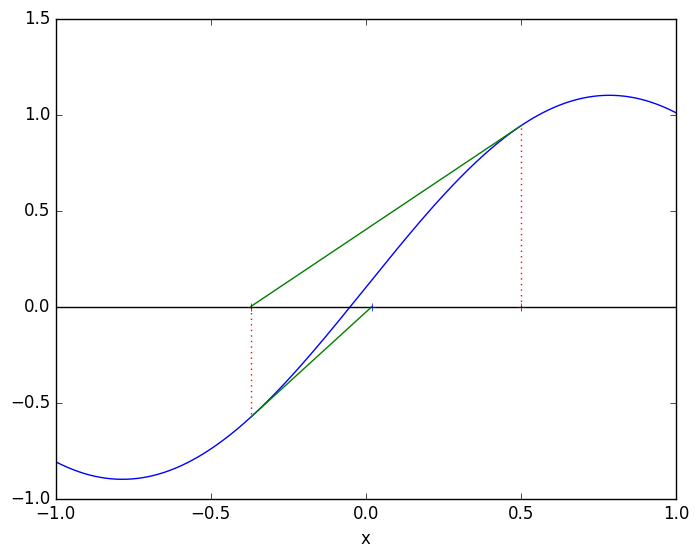

In [14]:
x=-1:.001:1
x0=0.5
x1=x0-(sin(2*x0)+0.1)/(2*cos(2*x0))
x2=x1-(sin(2*x1)+0.1)/(2*cos(2*x1))
axis([-1, 1, -1, 1.5])
plot(x,sin(2*x)+0.1, "b")
xlabel("x")

plot(linspace(-1,1),linspace(0,0),"k")
plot(linspace(x0,x1),linspace(sin(2*x0)+0.1,0),"g")
plot(linspace(x1,x2),linspace(sin(2*x1)+0.1,0),"g")

plot(linspace(x0,x0),linspace(0,sin(2*x0)+0.1),"r:")
plot(linspace(x1,x1),linspace(0,sin(2*x1)+0.1),"r:")

plot([x0,x1,x2],[0,0,0],"+");

Apply Newton's method to find a root of $$f(x)=2\cosh(x/4)-x.$$

In [15]:
function newton(f, fp, x; atol=1e-6, verbose=false)
    err = Inf
    verbose && @printf "%3s:  %10s\n"  "k" "err"
    for k=0:1000
        xnew = x - f(x)/fp(x)
        err = abs(x-xnew)
        verbose && @printf "%3i:  %10.2e\n"  k err
        err < atol && break
        x = xnew
    end 
    return x
end;

In [16]:
f  = x->2cosh(x/4)-x
fp = x->0.5sinh(x/4)-1
x = newton(f, fp, 4, atol=1e-12, verbose=true)

  k:         err
  0:    2.22e+00
  1:    5.43e-01
  2:    3.00e-02
  3:    9.58e-05
  4:    9.83e-10
  5:    4.44e-16


2.3575510538774016

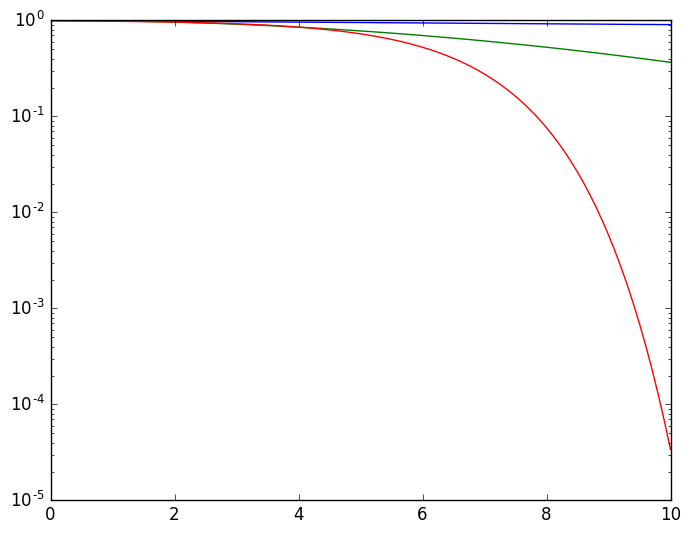

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31e885210>

In [17]:
k = 0:.1:10
α = 0.99
semilogy(k, α.^(k))
semilogy(k, α.^(k.^2))
semilogy(k, α.^(2.0.^k))